<b>Problem Statement :</b>

In finance, loan approval is a crucial and important task to be performed before providing loan to any person. This insures that the loan approved can be recovered in future. However to identify a person is a good fit for the loan or a defaulter, it becomes very hard to identify the characters and features that will help to decide the same.

Loan prediction model using Machine Learning becomes very usefull tool in these situation to predict the person is defaulter or not based on the past data.

<b>About Data :</b>

We have been given two datasets(train and test) containing the past transactions which includes some of the features of customers and a label which shows the customer was approved a loan or not.

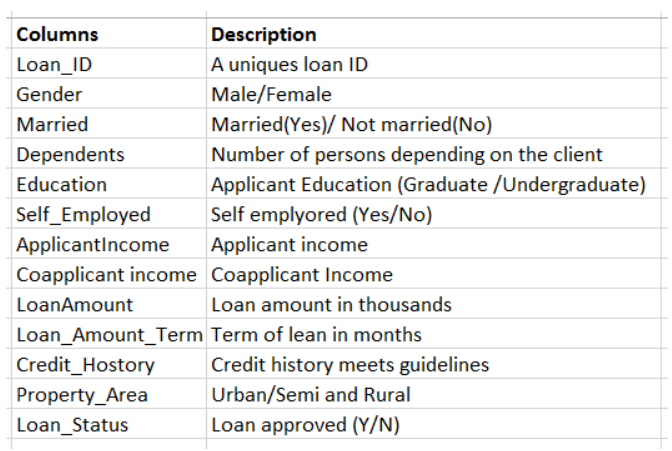

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('Loan Prediction Dataset.csv')

In [3]:
#inspecting the dataset
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#shape of dataset
df_train.shape

(614, 13)

In [5]:
#The describe() method is used to calculate statistical data like mean,std etc. of the numerical values of DataFrame.
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
'''
info() prints the summary of the dataframe. It prints the various information of the Dataframe such as columns,dtype,non-null 
values with their count and memory usage.
'''
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Preprocessing

In [7]:
#count of null values of each column
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#fill null value of numerical value columns with mean values 
df_train['LoanAmount']=df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Loan_Amount_Term']=df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean())
df_train['Credit_History']=df_train['Credit_History'].fillna(df_train['Credit_History'].mean())

In [9]:
#fill null value of categorical value columns with mode values 
df_train['Gender']=df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Married']=df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Dependents']=df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Self_Employed']=df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])

In [10]:
#no null values present
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
import seaborn as sns

# Exploratory Data Analysis

### categorical features visualization

<Axes: xlabel='Gender', ylabel='count'>

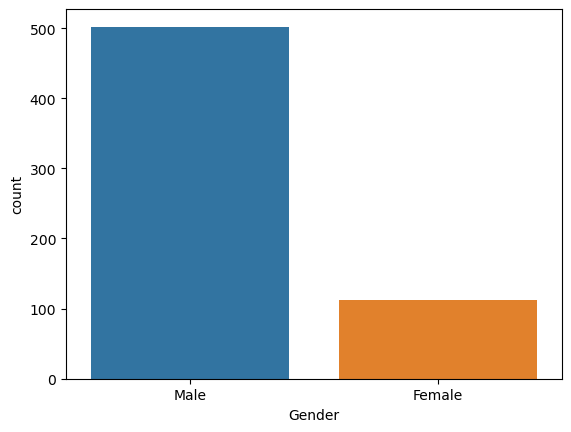

In [12]:
#1.Gender
sns.countplot(x='Gender',data=df_train)

<Axes: xlabel='Married', ylabel='count'>

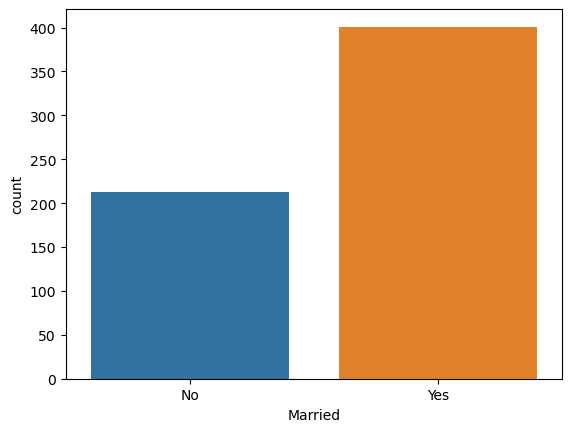

In [13]:
#2.Married or not
sns.countplot(x='Married',data=df_train)

<Axes: xlabel='Dependents', ylabel='count'>

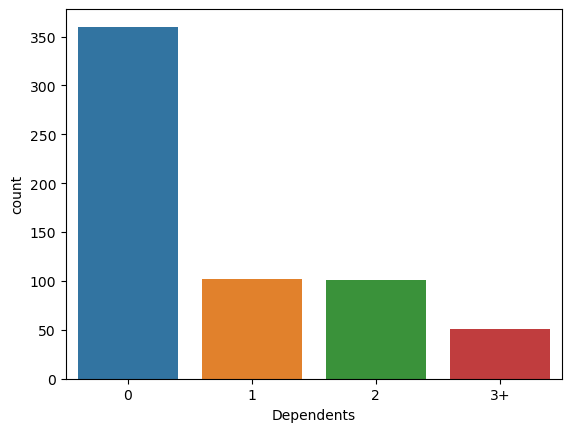

In [14]:
#3.Dependents
sns.countplot(x='Dependents',data=df_train)

<Axes: xlabel='Education', ylabel='count'>

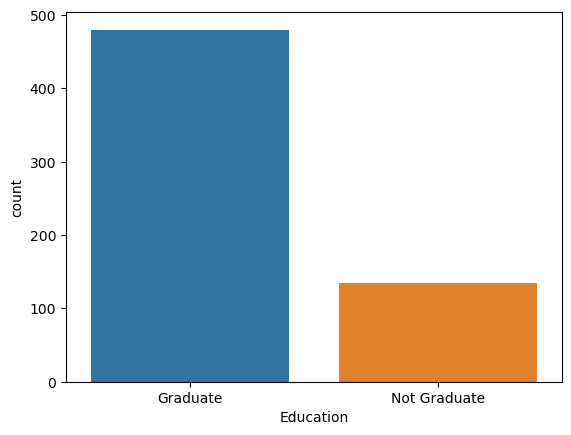

In [15]:
#4.Education
sns.countplot(x='Education',data=df_train)

<Axes: xlabel='Self_Employed', ylabel='count'>

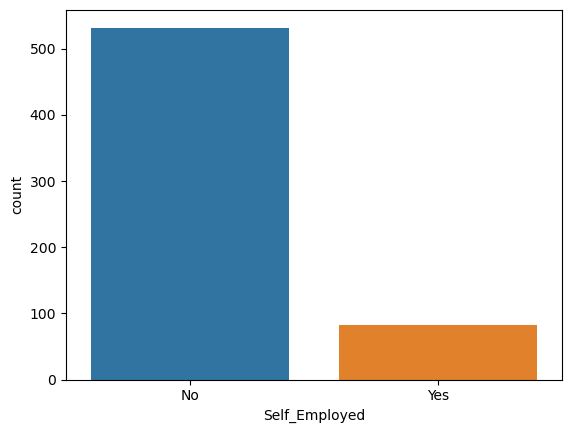

In [16]:
#5.Self Employed or not
sns.countplot(x='Self_Employed',data=df_train)

<Axes: xlabel='Property_Area', ylabel='count'>

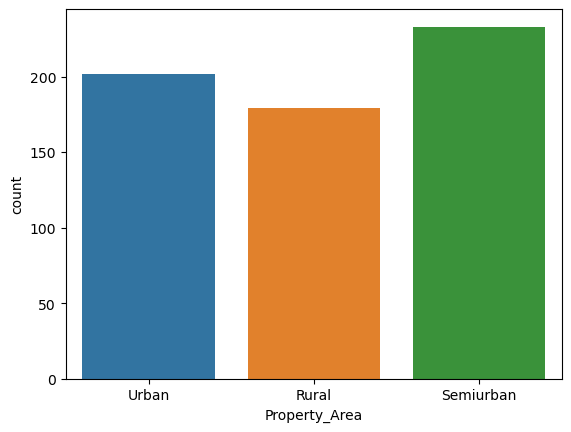

In [17]:
#6.Property Area
sns.countplot(x='Property_Area',data=df_train)

<Axes: xlabel='Loan_Status', ylabel='count'>

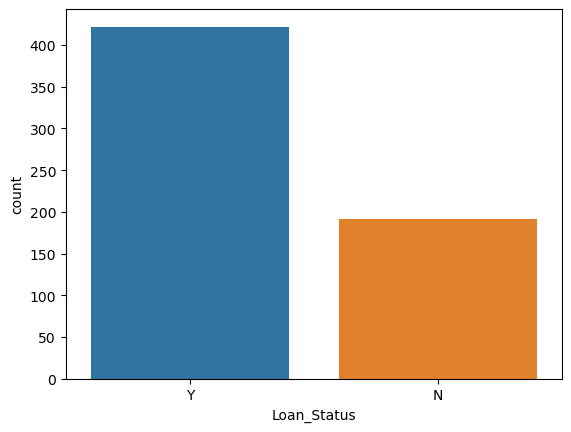

In [18]:
#7.Loan Status
sns.countplot(x='Loan_Status',data=df_train)

<u>Note - The above plot suggests that data is imbalanced</u>

### numerical features visualization

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

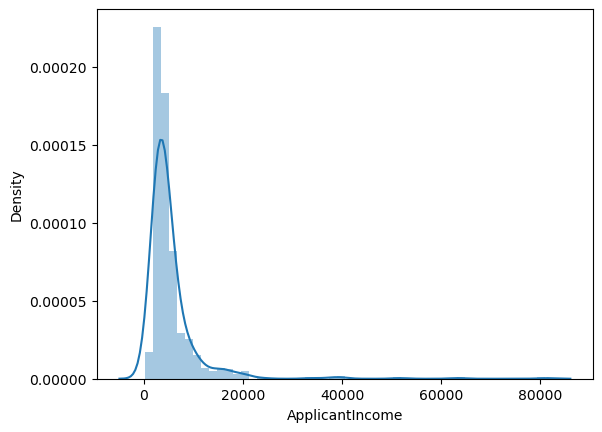

In [19]:
#1.ApplicantIncome   
sns.distplot(df_train['ApplicantIncome']) 

Data is right skewed.After 20,000 the values are very less.

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

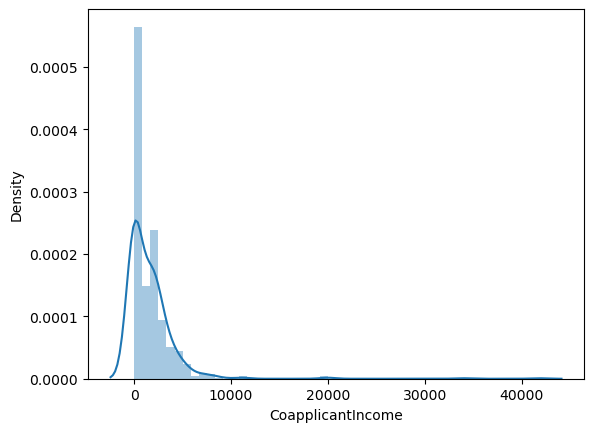

In [20]:
#2.CoapplicantIncome    
sns.distplot(df_train['CoapplicantIncome']) 

Data is right skewed.After 10,000 the values are very less.

<Axes: xlabel='LoanAmount', ylabel='Density'>

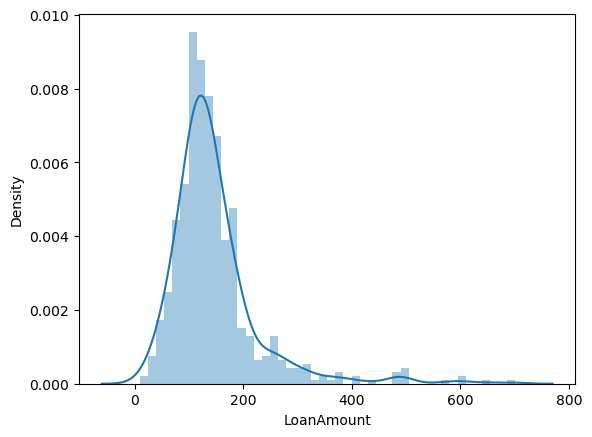

In [21]:
#3.LoanAmount           
sns.distplot(df_train['LoanAmount']) 

Data is right skewed.After 400, the values are very less.

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

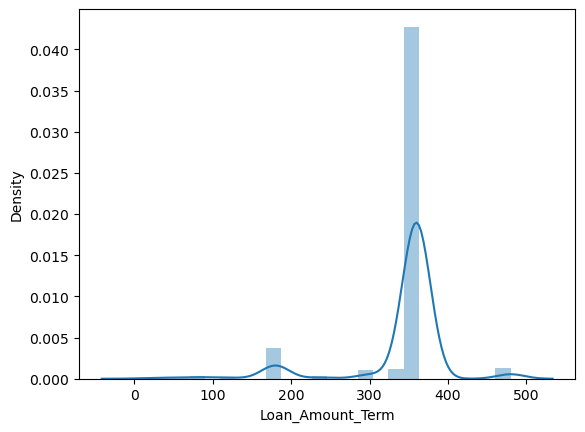

In [22]:
#4.Loan_Amount_Term             
sns.distplot(df_train['Loan_Amount_Term']) 

Data is left skewed.Most of the values are around 350.

<Axes: xlabel='Credit_History', ylabel='Density'>

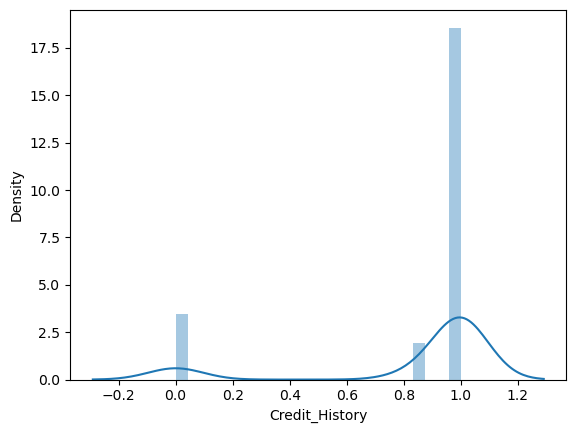

In [23]:
#5.Credit_History 
sns.distplot(df_train['Credit_History']) 

### Creation of new attributes

In [24]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']   

In [25]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [26]:
import numpy as np

### Log transformations

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

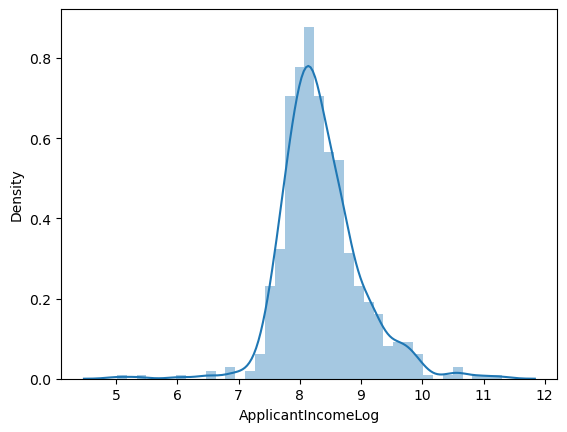

In [27]:
df_train['ApplicantIncomeLog'] = np.log(df_train['ApplicantIncome'])
sns.distplot(df_train["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

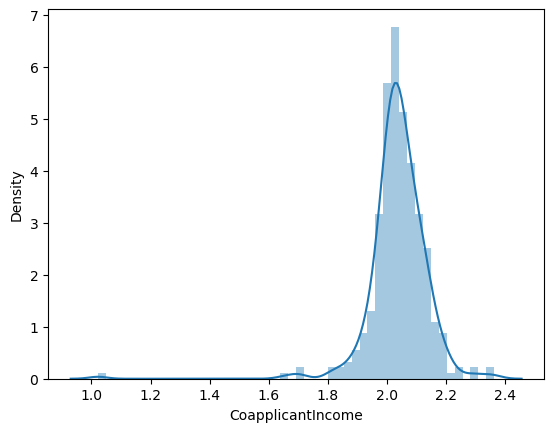

In [29]:
df_train['CoapplicantIncome']=np.log(df_train['CoapplicantIncome'])
sns.distplot(df_train['CoapplicantIncome']) 

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

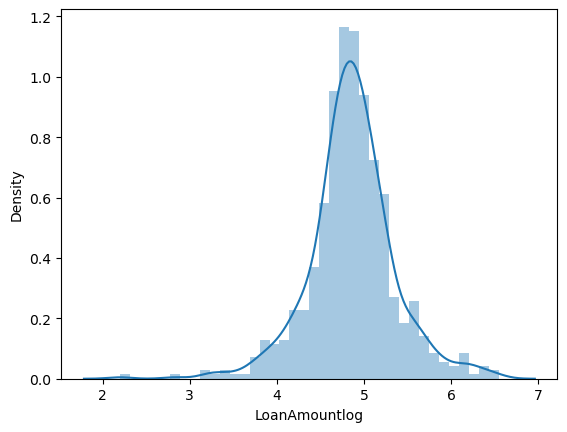

In [30]:
df_train['LoanAmountlog']=np.log(df_train['LoanAmount'])
sns.distplot(df_train['LoanAmountlog']) 

<Axes: xlabel='Loan_Amount_Termlog', ylabel='Density'>

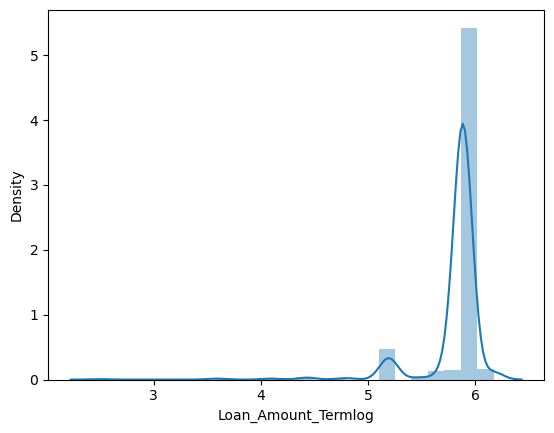

In [31]:
df_train['Loan_Amount_Termlog']=np.log(df_train['Loan_Amount_Term'])
sns.distplot(df_train['Loan_Amount_Termlog']) 

<Axes: xlabel='Total_Incomelog', ylabel='Density'>

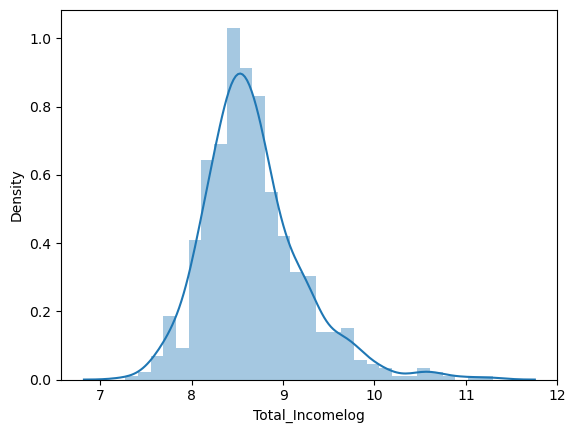

In [32]:
df_train['Total_Incomelog']=np.log(df_train['Total_Income'])
sns.distplot(df_train['Total_Incomelog']) 

In [33]:
df_train.drop(['ApplicantIncome','LoanAmount','Loan_Amount_Term','Loan_ID'], axis=1,inplace=True)

In [34]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog
0,Male,No,0,Graduate,No,NaN,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.990411,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,NaN,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,2.049700,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,NaN,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104,8.699515


### Correlation Matrix

<Axes: >

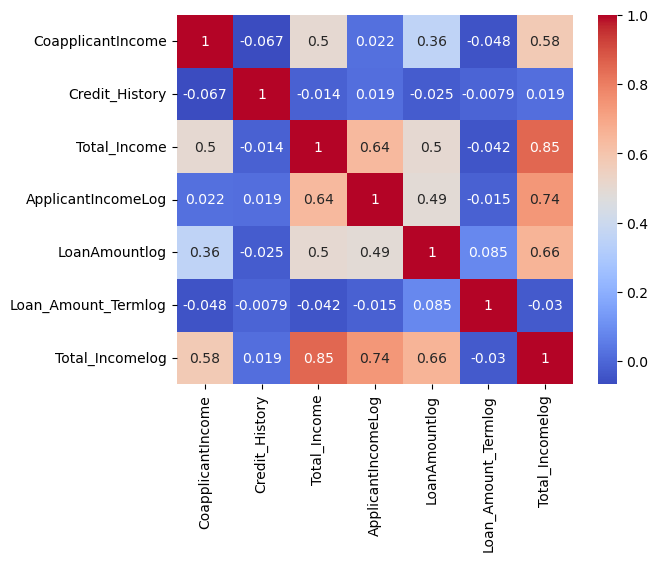

In [35]:
sns.heatmap(df_train.corr(), annot=True , cmap='coolwarm')

### Label encoding

In [36]:
'''
using a LabelEncoder to transform categorical variables into numeric values. 

For each column, it applies the fit_transform method of the LabelEncoder to convert the categorical values in that column 
to numeric values.

The fit_transform method has two steps:
1.The fit step analyzes the unique values in the column and assigns a unique integer to each distinct category.
2.The transform step replaces the original categorical values in the column with the corresponding integer labels.

This transformation is especially useful when you have categorical variables that are not ordinal.
'''
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df_train[col] = le.fit_transform(df_train[col])

In [37]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog
0,1,0,0,0,0,NaN,1.0,2,1,5849.0,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.990411,1.0,0,0,6091.0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,NaN,1.0,2,1,3000.0,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,2.049700,1.0,2,1,4941.0,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,NaN,1.0,2,1,6000.0,8.699515,4.948760,5.886104,8.699515


### Train-Test Split

In [52]:
x = df_train.drop(columns=['Loan_Status'], axis=1)
y = df_train['Loan_Status']

In [58]:
#70 % training data
#30 % test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [59]:
#handling missing values in independent feature train set
x_train['CoapplicantIncome']=x_train['CoapplicantIncome'].fillna(x_train['CoapplicantIncome'].mean())

In [60]:
y_train.value_counts()

1    302
0    127
Name: Loan_Status, dtype: int64

In [61]:
y_test.value_counts()

1    120
0     65
Name: Loan_Status, dtype: int64

In [68]:
x_test.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
CoapplicantIncome      0
Credit_History         0
Property_Area          0
Total_Income           0
ApplicantIncomeLog     0
LoanAmountlog          0
Loan_Amount_Termlog    0
Total_Incomelog        0
dtype: int64

In [67]:
#handling missing values in independent feature test set
x_test['CoapplicantIncome']=x_test['CoapplicantIncome'].fillna(x_test['CoapplicantIncome'].mean())

In [87]:
from sklearn.metrics import f1_score, roc_auc_score

### Model Training and Performance

#### 1.Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [134]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [135]:
f1 = f1_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

In [136]:
print("F1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc1)

F1 Score:  0.7868852459016393
ROC-AUC Score:  0.5520512820512821


#### 1.Decision Tree Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [139]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [140]:
f2 = f1_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

In [141]:
print("F1 Score: ", f2)
print("ROC-AUC Score: ", roc_auc2)

F1 Score:  0.7654320987654322
ROC-AUC Score:  0.6567307692307692


#### 3.Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [144]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [145]:
f3 = f1_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

In [146]:
print("F1 Score: ", f3)
print("ROC-AUC Score: ", roc_auc3)

F1 Score:  0.8560606060606061
ROC-AUC Score:  0.7888461538461539


# Roc-auc score is highest for Random Forest Classifier, so,Random Forest Classifier is the most optimal algorithm.